# Image Thresholding

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('../DATA/rainbow.jpg')

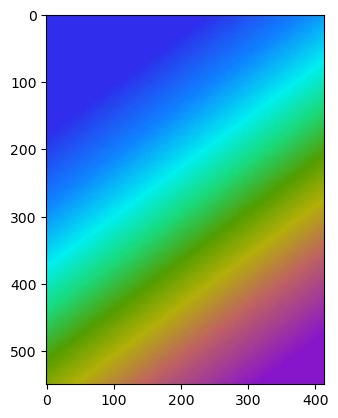

In [3]:
plt.imshow(img)

In [4]:
# Adding the 0 flag to read it in black and white
img = cv2.imread('../DATA/rainbow.jpg',0)

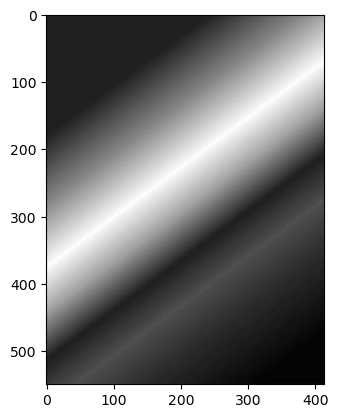

In [5]:
plt.imshow(img,cmap='gray')

## Different Threshold Types

### Binary

In [6]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Hàm threshold trong OpenCV được sử dụng để ngưỡng hoá ảnh
# Tất cả các pixel trong ảnh có giá trị lớn hơn hoặc bằng 127 sẽ được gán giá trị là 255(màu đen), ngược lại gán giá trị bằng 0
# => Điều này tạo ra một hình ảnh nhị phân, trong đó các đối tượng được hiển thị màu trắng và nền là màu đen
# cv2.THRESH_BINARY đây là một loại hằng số, với đầu ra là ngưỡng nhị phân 0 hoặc 255

In [7]:
ret

127.0

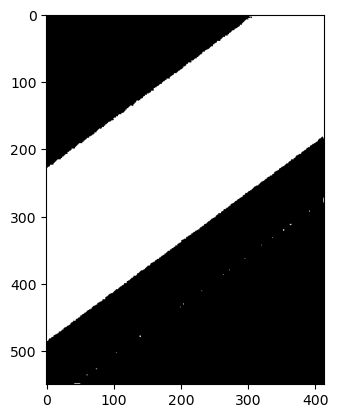

In [8]:
plt.imshow(thresh1,cmap='gray')

### Binary Inverse

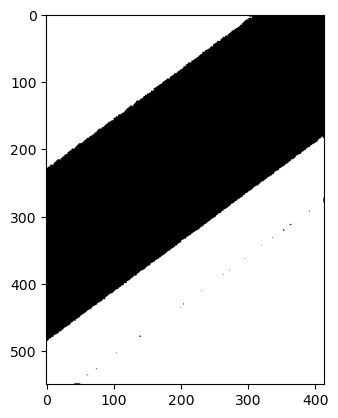

In [9]:
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap='gray')
# cv2.THRESH_BINARY_INV là hằng số nghĩa là các pixel có giá trị nhỏ hơn 127 sẽ được gán giá trị 255 (trắng) và các pixel có giá trị lớn hơn hoặc bằng 127 sẽ được gán giá trị 0 (đen).

###  Threshold Truncation

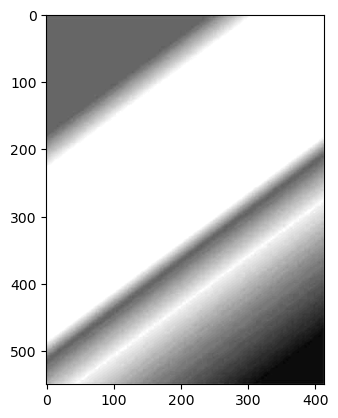

In [10]:
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
plt.imshow(thresh3,cmap='gray')
# Biến cv2.THRESH_TRUNC trong đó các pixel có giá trị lớn hơn 127 sẽ có giá trị là 127 và các pixel có giá trị nhỏ hơn 127 giữ nguyên giá trị của chúng.

### Threshold to Zero

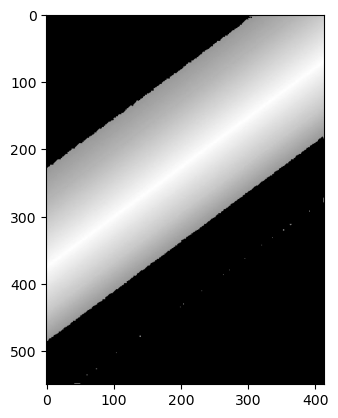

In [11]:
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
plt.imshow(thresh4,cmap='gray')
# cv2.THRESH_TOZERO nghĩa là các pixel có giá trị lớn hơn ngưỡng 127 sẽ được giữ nguyên giá trị của chúng,các pixel có giá trị nhỏ hơn ngưỡng sẽ được đặt thành 0.

### Threshold to Zero (Inverse)

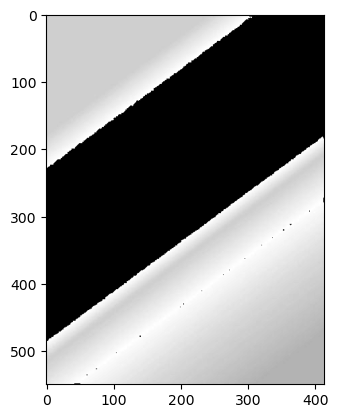

In [12]:
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
plt.imshow(thresh5,cmap='gray')
# cv2.THRESH_TOZERO_INV có nghĩa là các pixel có giá trị nhỏ hơn ngưỡng 127 sẽ được đặt thành 0, và các pixel có giá trị lớn hơn hoặc bằng 127 sẽ giữ nguyên giá trị của chúng.

# Real World Applications

## Adaptive Thresholding



### Sudoku Image

In [16]:
img = cv2.imread("../DATA/crossword.jpg",0)

In [20]:
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

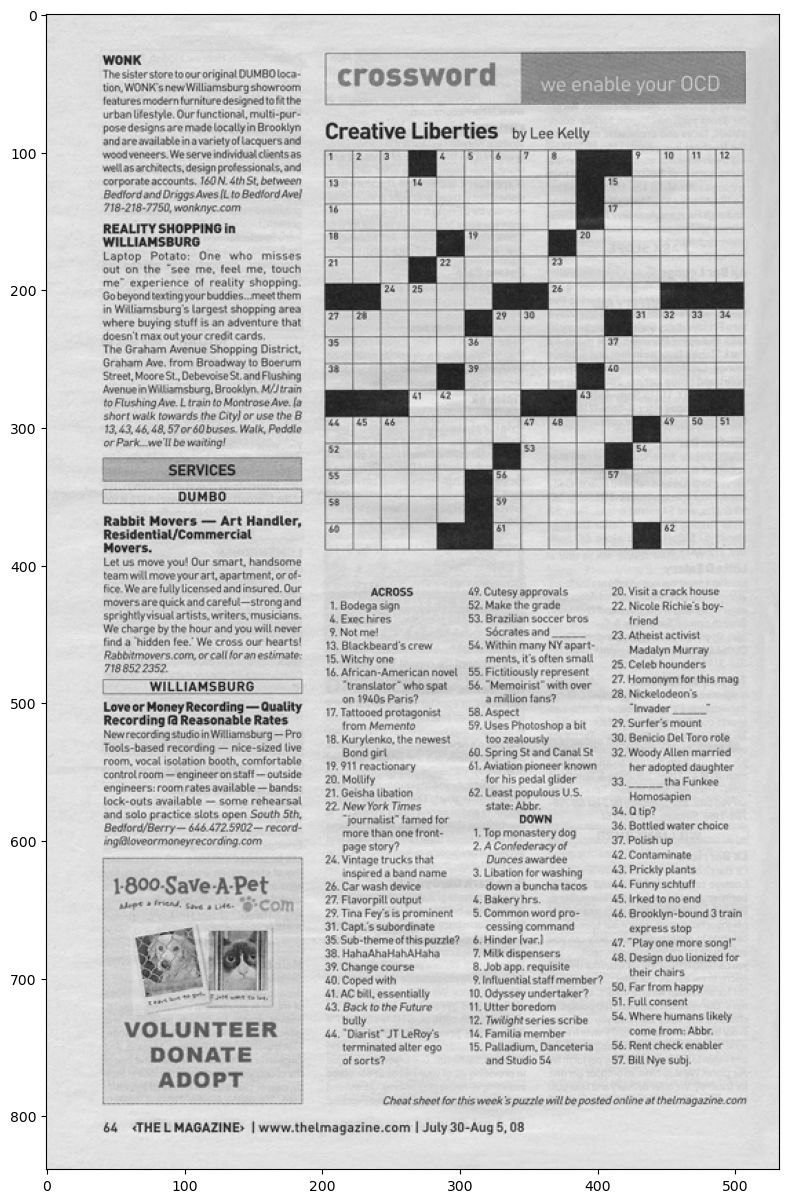

In [21]:
show_pic(img)

## Simple Binary

In [22]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

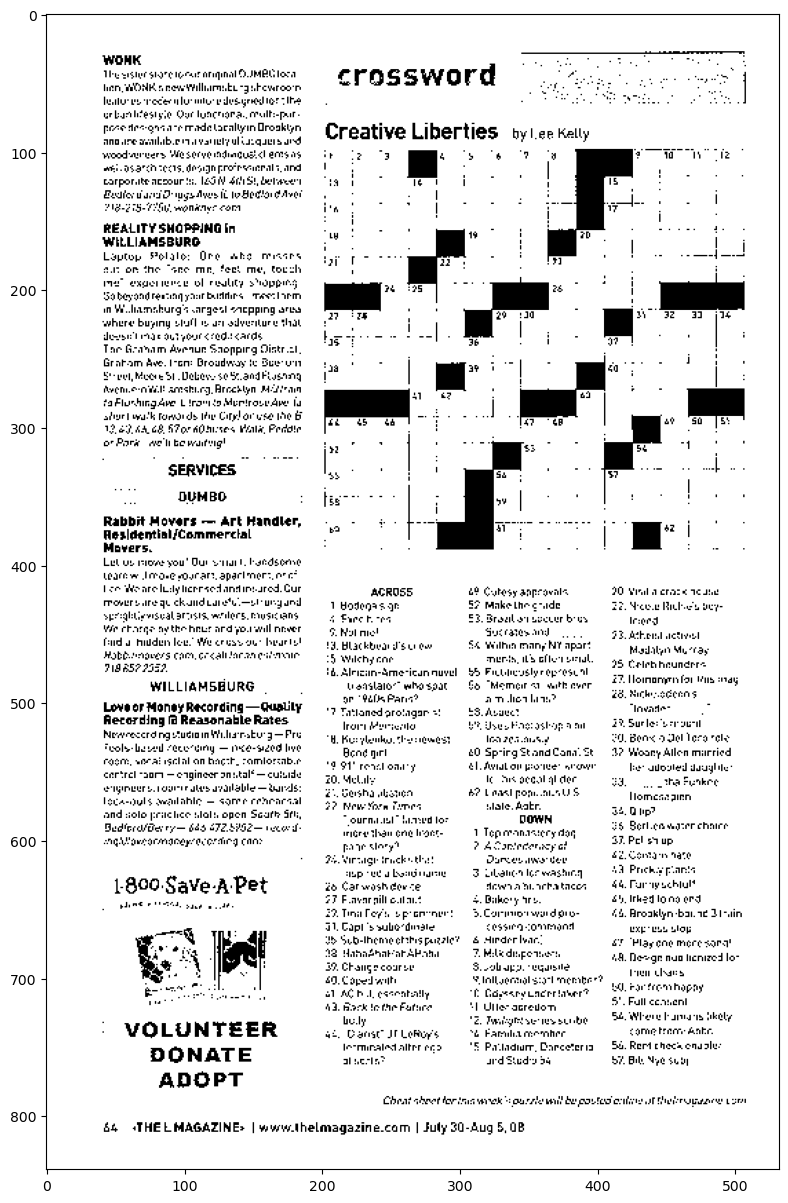

In [23]:
show_pic(th1)

### Adaptive Threshold

https://stackoverflow.com/questions/28763419/adaptive-threshold-parameters-confusion

    @param src Source 8-bit single-channel image.
    .   @param dst Destination image of the same size and the same type as src.
    .   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
    .   @param adaptiveMethod Adaptive thresholding algorithm to use, see #AdaptiveThresholdTypes.
    .   The #BORDER_REPLICATE | #BORDER_ISOLATED is used to process boundaries.
    .   @param thresholdType Thresholding type that must be either #THRESH_BINARY or #THRESH_BINARY_INV,
    .   see #ThresholdTypes.
    .   @param blockSize Size of a pixel neighborhood that is used to calculate a threshold value for the
    .   pixel: 3, 5, 7, and so on.
    .   @param C Constant subtracted from the mean or weighted mean (see the details below). Normally, it
    .   is positive but may be zero or negative as well.

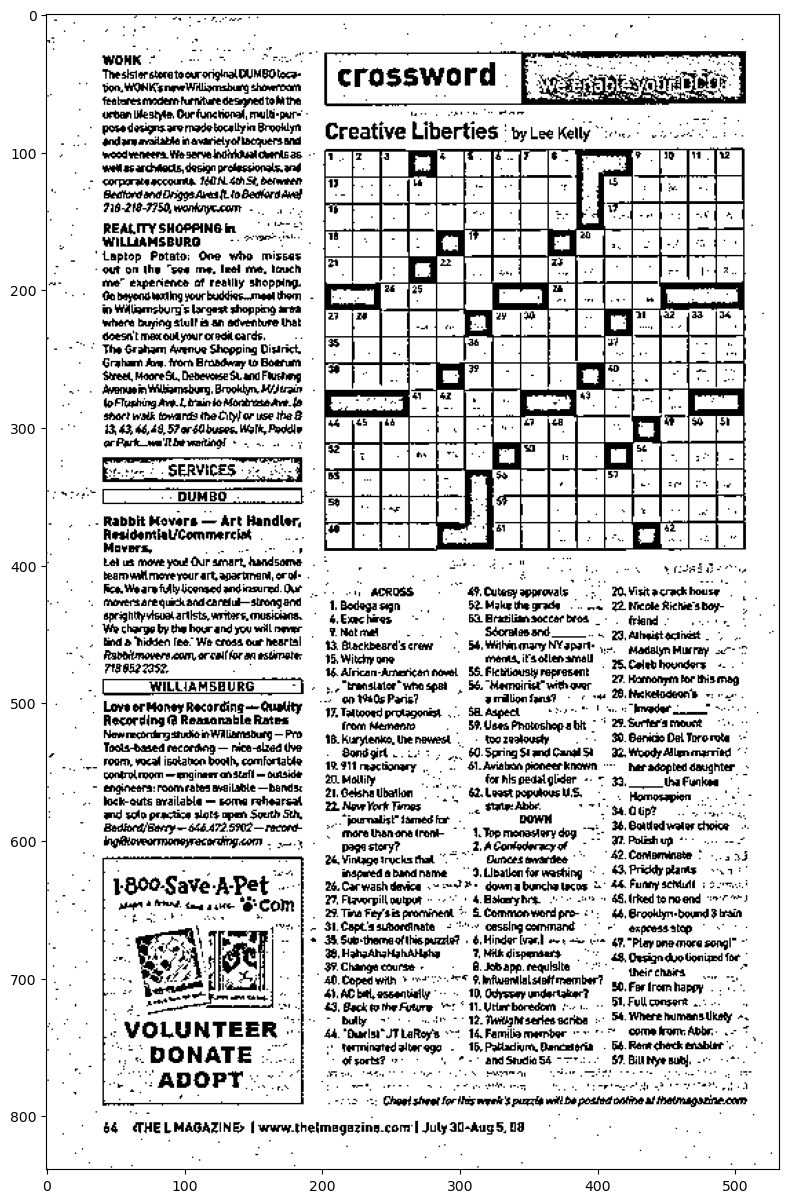

In [28]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8) # Play around with these last 2 numbers
show_pic(th2)

In [25]:
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,8)

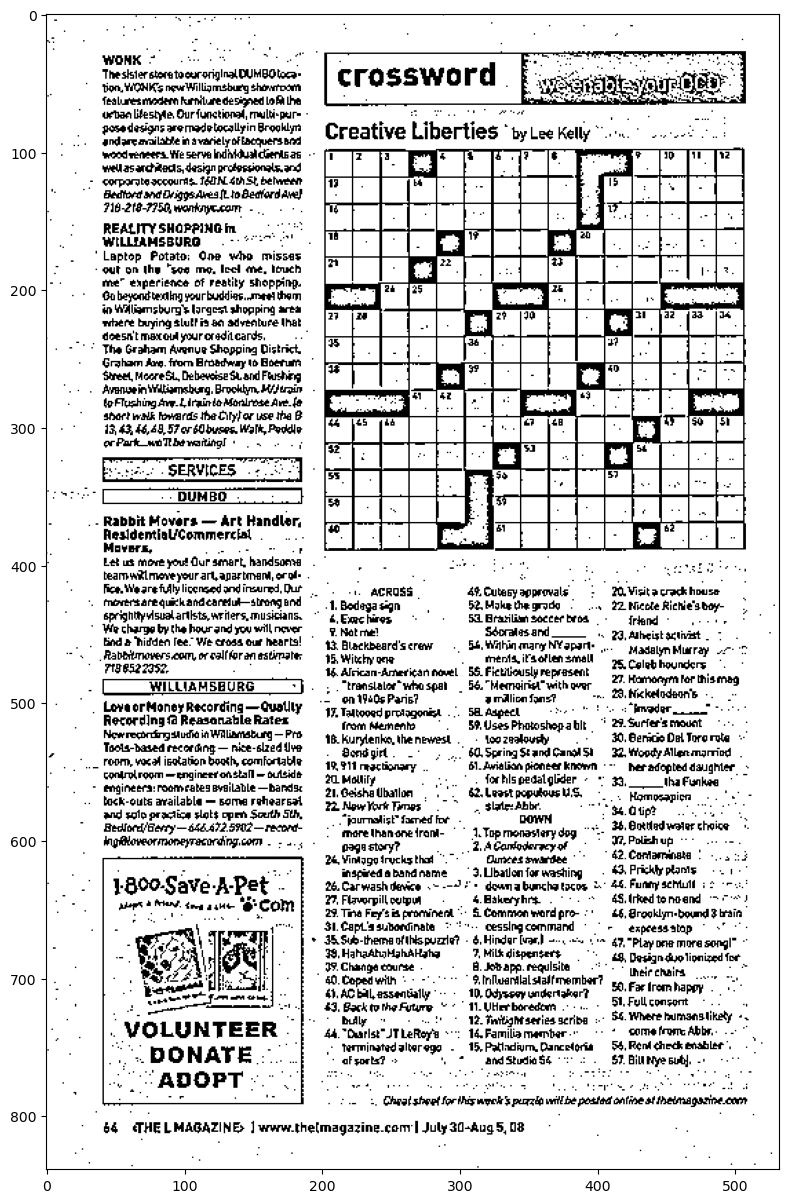

In [26]:
show_pic(th3)

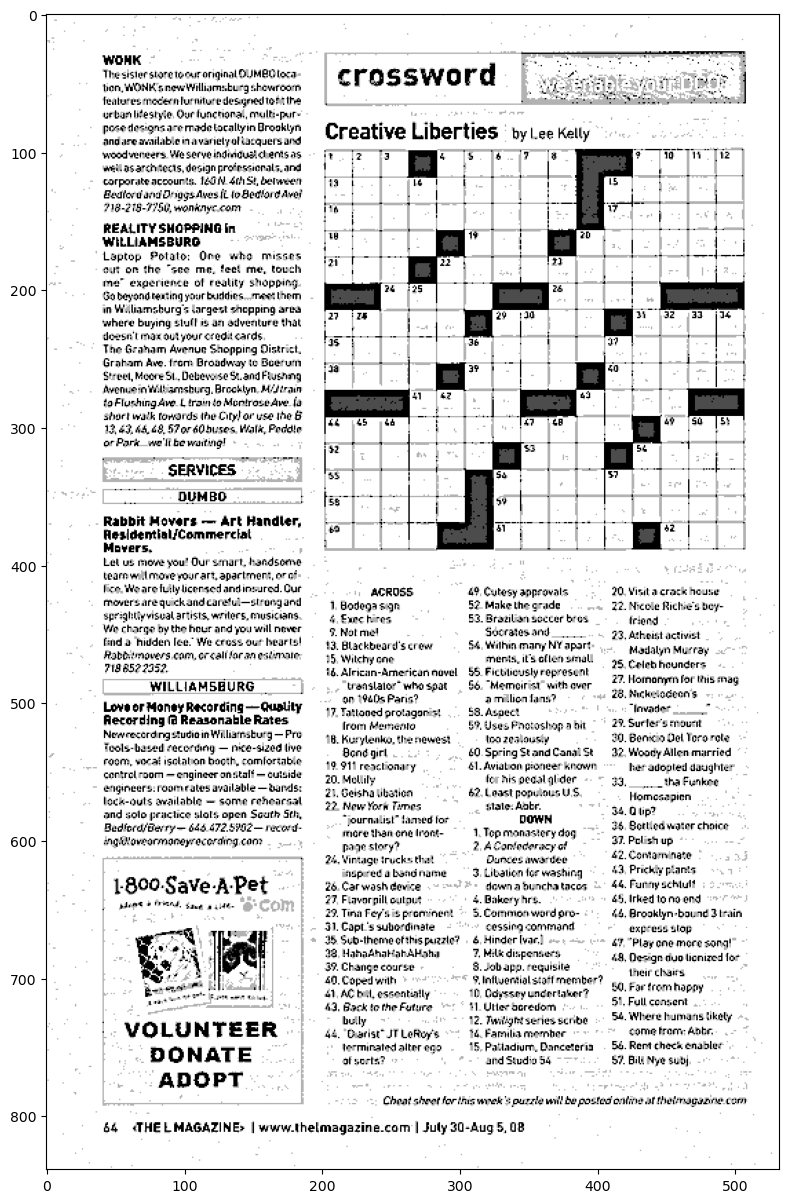

In [27]:
blended = cv2.addWeighted(src1=th1,alpha=0.7,src2=th2,beta=0.3,gamma=0)
show_pic(blended)

## Great Work!